In [1]:
""" Solve Job Selection Problem and perform Sensitivity Analysis 
    using AHP3Lmodel Class """
from DecisionAnalysisPy import AHP3Lmodel
import numpy as np

In [2]:
# Define your AHP model and data here
Goal = "Job Satisfaction"
main_criteria = ["Research",   "Growth",   "Benefits", 
                 "Colleagues", "Location", "Reputation"]
# Upper triangle of criteria pairwise comparison matrix
main_criteria_matrix = np.array([1, 1, 4,  1,  1/2,
                                    2, 4,  1,  1/2,
                                       5,  3,  1/2,
                                          1/3, 1/3,
                                                1  ])

alternatives = ["Company A", "Company B", "Company C"]

# Upper triangles of alternatives pairwise comp matrix wrt each criterion
alt_matrices  = [ np.array([1/4, 1/2,  3 ]),  # wrt Research
                  np.array([1/4, 1/5, 1/2]),  # wrt Growth
                  np.array([ 3,  1/3, 1/7]),  # wrt Benefits
                  np.array([1/3,  5,   7 ]),  # wrt Colleagues
                  np.array([ 1,   7,   7 ]),  # wrt Location
                  np.array([ 7,   9,   2 ]),  # wrt Reputation
                ]
# End of model definition and data

In [3]:
# Create a 3-Level AHP model
JobSelect = AHP3Lmodel(Goal, main_criteria, main_criteria_matrix,
                       alternatives, alt_matrices)

In [4]:
# Get a model structure and data
JobSelect.model()

Model Summary:
Goal: Job Satisfaction
Criteria:
  Number = 6
  ['Research', 'Growth', 'Benefits', 'Colleagues', 'Location', 'Reputation']

Pairwise comparison w.r.t. Goal Job Satisfaction:
[[ 1    1    1    4    1   1/2 ]
 [ 1    1    2    4    1   1/2 ]
 [ 1   1/2   1    5    3   1/2 ]
 [1/4  1/4  1/5   1   1/3  1/3 ]
 [ 1    1   1/3   3    1    1  ]
 [ 2    2    2    3    1    1  ]]

Alternatives:
  Number = 3
  ['Company A', 'Company B', 'Company C']

Pairwise comparison w.r.t criterion Research
[[ 1   1/4  1/2 ]
 [ 4    1    3  ]
 [ 2   1/3   1  ]]

Pairwise comparison w.r.t criterion Growth
[[ 1   1/4  1/5 ]
 [ 4    1   1/2 ]
 [ 5    2    1  ]]

Pairwise comparison w.r.t criterion Benefits
[[ 1    3   1/3 ]
 [1/3   1   1/7 ]
 [ 3    7    1  ]]

Pairwise comparison w.r.t criterion Colleagues
[[ 1   1/3   5  ]
 [ 3    1    7  ]
 [1/5  1/7   1  ]]

Pairwise comparison w.r.t criterion Location
[[ 1    1    7  ]
 [ 1    1    7  ]
 [1/7  1/7   1  ]]

Pairwise comparison w.r.t criterion 

In [5]:
# Solve the model
results = JobSelect.solve(method='Algebra')
# "Power", "Algebra", "RGM", "ColsNorm", "GenEigen"


Model Summary:
  Goal: Job Satisfaction
  Criteria: ['Research', 'Growth', 'Benefits', 'Colleagues', 'Location', 'Reputation']
  Alternatives: ['Company A', 'Company B', 'Company C']

Criteria w.r.t. Goal Job Satisfaction:

[[ 1    1    1    4    1   1/2 ]
 [ 1    1    2    4    1   1/2 ]
 [ 1   1/2   1    5    3   1/2 ]
 [1/4  1/4  1/5   1   1/3  1/3 ]
 [ 1    1   1/3   3    1    1  ]
 [ 2    2    2    3    1    1  ]]
Lambda_max = 6.420344, CI= 0.084069, CR= 0.067797
Criteria Weights= [0.158408 0.189247 0.197997 0.04831  0.150245 0.255792]

Alternatives w.r.t. criterion Research
[[ 1   1/4  1/2 ]
 [ 4    1    3  ]
 [ 2   1/3   1  ]]
Lambda_max = 3.018295, CI= 0.009147, CR= 0.015771
Local Weights= [0.1365   0.625013 0.238487]

Alternatives w.r.t. criterion Growth
[[ 1   1/4  1/5 ]
 [ 4    1   1/2 ]
 [ 5    2    1  ]]
Lambda_max = 3.024595, CI= 0.012298, CR= 0.021203
Local Weights= [0.09739  0.333069 0.569541]

Alternatives w.r.t. criterion Benefits
[[ 1    3   1/3 ]
 [1/3   1   1/7 ]


In [6]:
# Print just the alterative global weights 
print(results)

{'Company A': 0.3744666462485834, 'Company B': 0.3144914469034947, 'Company C': 0.31104190684792177}



Sensivity Analysis:

Rainbow Diagram for changing weight of criterion Research


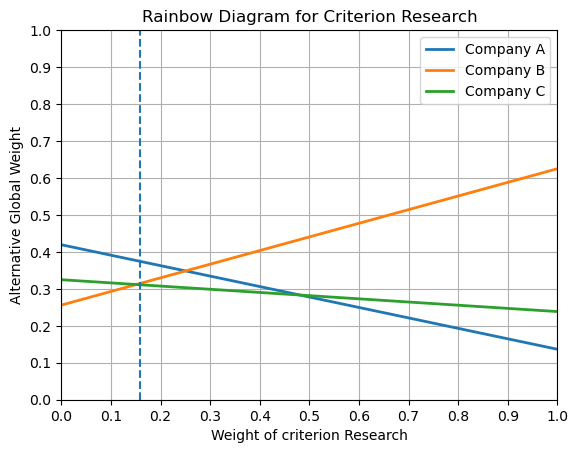


Rainbow Diagram for changing weight of criterion Growth


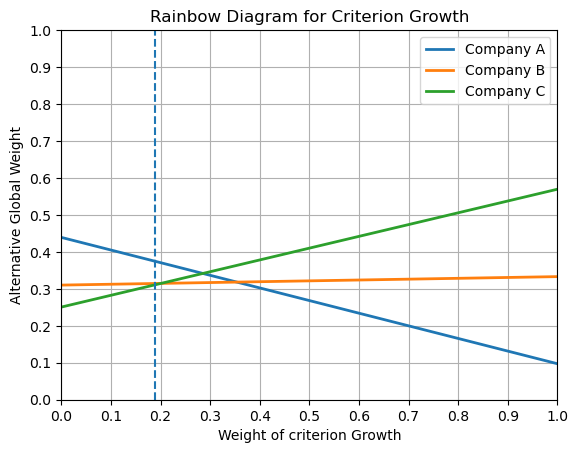


Rainbow Diagram for changing weight of criterion Benefits


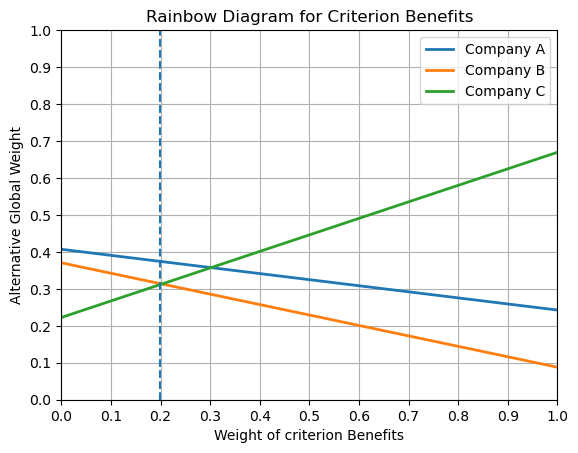


Rainbow Diagram for changing weight of criterion Colleagues


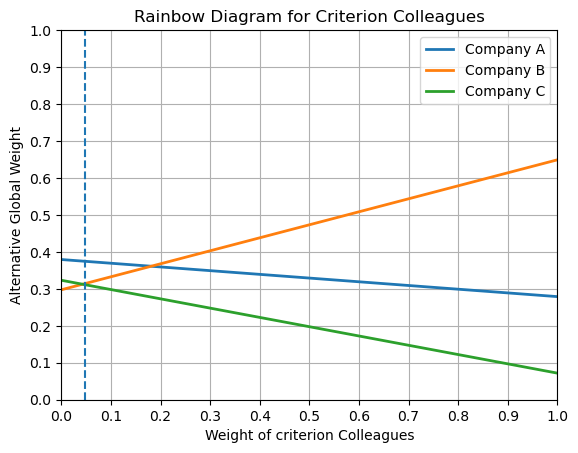


Rainbow Diagram for changing weight of criterion Location


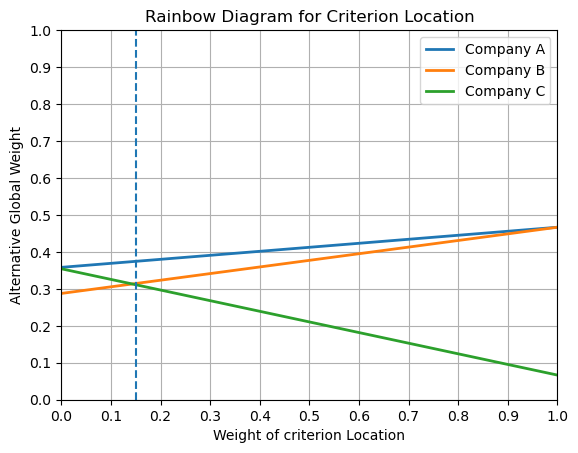


Rainbow Diagram for changing weight of criterion Reputation


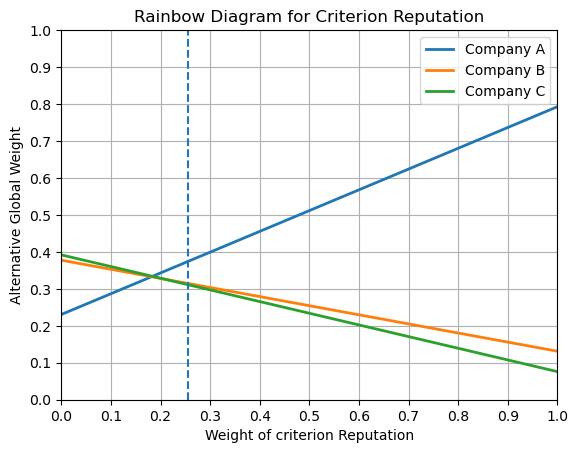

In [7]:
# Perform Sensitivity Analysis
JobSelect.sensit()